In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso , LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [79]:
SBA_float_data = pd.read_excel("SBA_FLOAT_LIST.xlsx",sheet_name="float",header=1)
SBA_float_data = SBA_float_data.drop(["Security","Coupon Type","Type","Security.1","Security.2",
                                      "TICKER ","Unnamed: 13","MTG_PL_CPR_1M","MTG_PL_CPR_3M",
                                      "MTG_PL_CPR_12M","MTG_PL_CPR_ISS","RESET_IDX"], axis=1)

SBA_float_data["REFIX_FREQ"] = SBA_float_data["REFIX_FREQ"].astype("category")
SBA_float_data["CPN_FREQ"] = SBA_float_data["CPN_FREQ"].astype("category")

SBA_float_data['Maturity'] = pd.to_datetime(SBA_float_data['Maturity'])
SBA_float_data['Maturity']=SBA_float_data['Maturity'].map(dt.datetime.toordinal)

SBA_float_data['ISSUE_DT'] = pd.to_datetime(SBA_float_data['ISSUE_DT'])
SBA_float_data['ISSUE_DT']=SBA_float_data['ISSUE_DT'].map(dt.datetime.toordinal)


CPR_indicator =  [1 if x != 0 else 0 for x in SBA_float_data['MTG_PL_CPR_6M']]

SBA_float_data['CPR_indicator'] = CPR_indicator

SBA_float_data.head(10)


,Coupon,Factor,Current Amount,Original Amount,WAC,WAM,WALA,Maturity,LQA_SECTOR_SCORE,FLT_SPREAD,MTG_WHLN_NUMBER_LOAN,MTG_NUM_ORIG_LOAN,REFIX_FREQ,CPN_FREQ,CPN,MTG_PL_CPR_6M,MTG_ORIG_WAM,ISSUE_DT,CPR_indicator
0,7.625,0.001181,26864.31,22744259.28,7.625,4,297,738788,59.0,-37.5,1,62,4,12,7.625,6.881213,262,729633,1
1,7.945,0.000600,4855.09,8090331.36,7.945,3,297,738788,54.0,-30.5,1,21,12,12,7.945,85.966244,273,729633,1
2,5.625,0.000241,9102.55,37830703.35,5.625,2,296,738818,96.0,-262.5,1,117,12,12,5.625,81.833629,290,729663,1
3,5.375,0.002607,12675.14,4862877.47,5.375,5,296,738818,87.0,-262.5,1,10,4,12,5.375,0.000000,300,729663,0
4,7.875,0.000758,7570.50,9986740.66,7.875,5,296,738818,56.0,-12.5,1,31,4,12,7.875,74.786068,259,729663,1
5,7.625,0.000492,7112.03,14467235.07,7.625,3,295,738849,59.0,-37.5,1,41,4,12,7.625,91.214804,267,729694,1
6,8.060,0.002413,47921.65,19862930.56,8.060,5,295,738879,51.0,-19.0,1,70,12,12,8.060,0.000000,268,729694,0
7,8.000,0.002336,61400.46,26284207.92,8.000,2,295,738879,53.0,0.0,1,65,4,12,8.000,1.967761,276,729694,1
8,7.125,0.002977,11791.98,3961510.07,7.125,5,294,738849,61.0,-87.5,2,15,4,12,7.125,5.746700,296,729724,1
9,5.500,0.001099,33012.75,30025494.97,5.500,6,293,738910,95.0,-250.0,3,89,4,12,5.500,0.000000,281,729755,0


In [80]:
SBA_float_data.nunique()


Coupon                   944
Factor                  3949
Current Amount          4002
Original Amount         4002
WAC                      944
WAM                      302
WALA                     292
Maturity                 333
LQA_SECTOR_SCORE         100
FLT_SPREAD               935
MTG_WHLN_NUMBER_LOAN     158
MTG_NUM_ORIG_LOAN        218
REFIX_FREQ                 3
CPN_FREQ                   1
CPN                      944
MTG_PL_CPR_6M           2320
MTG_ORIG_WAM             226
ISSUE_DT                 292
CPR_indicator              2
dtype: int64

In [81]:
SBA_float_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Coupon                4002 non-null   float64 
 1   Factor                4002 non-null   float64 
 2   Current Amount        4002 non-null   float64 
 3   Original Amount       4002 non-null   float64 
 4   WAC                   4002 non-null   float64 
 5   WAM                   4002 non-null   int64   
 6   WALA                  4002 non-null   int64   
 7   Maturity              4002 non-null   int64   
 8   LQA_SECTOR_SCORE      3945 non-null   float64 
 9   FLT_SPREAD            4001 non-null   float64 
 10  MTG_WHLN_NUMBER_LOAN  4002 non-null   int64   
 11  MTG_NUM_ORIG_LOAN     4002 non-null   int64   
 12  REFIX_FREQ            4002 non-null   category
 13  CPN_FREQ              4002 non-null   category
 14  CPN                   4002 non-null   float64 
 15  MTG_

In [82]:
SBA_float_data.isnull().sum()

Coupon                    0
Factor                    0
Current Amount            0
Original Amount           0
WAC                       0
WAM                       0
WALA                      0
Maturity                  0
LQA_SECTOR_SCORE         57
FLT_SPREAD                1
MTG_WHLN_NUMBER_LOAN      0
MTG_NUM_ORIG_LOAN         0
REFIX_FREQ                0
CPN_FREQ                  0
CPN                       0
MTG_PL_CPR_6M           157
MTG_ORIG_WAM              0
ISSUE_DT                  0
CPR_indicator             0
dtype: int64

In [83]:
SBA_float_data=SBA_float_data.dropna()

In [100]:
x=SBA_float_data.drop(["CPR_indicator","MTG_PL_CPR_6M"],axis=1)
y=SBA_float_data["CPR_indicator"]
print(x)
print(y)

      Coupon    Factor  Current Amount  Original Amount     WAC  WAM  WALA  \
0      7.625  0.001181        26864.31      22744259.28   7.625    4   297   
1      7.945  0.000600         4855.09       8090331.36   7.945    3   297   
2      5.625  0.000241         9102.55      37830703.35   5.625    2   296   
3      5.375  0.002607        12675.14       4862877.47   5.375    5   296   
4      7.875  0.000758         7570.50       9986740.66   7.875    5   296   
...      ...       ...             ...              ...     ...  ...   ...   
3978   9.488  0.936417     13544035.63      14463678.33   9.488  106     8   
3979   9.421  0.920580     10280801.94      11167747.31   9.421  112     8   
3980   9.508  0.914832     14517244.60      15868756.78   9.508  112     7   
3981   9.381  0.960674     18240425.16      18987114.66   9.381  111     6   
3982  10.678  0.878805      8878362.31      10102770.00  10.678  112     6   

      Maturity  LQA_SECTOR_SCORE  FLT_SPREAD  MTG_WHLN_NUMBER_L

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [86]:
logmodel=LogisticRegression(random_state = 0, C=0.001, fit_intercept = True)

In [87]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=0.001, random_state=0)

In [88]:
predictions = logmodel.predict(x_test)
predictions

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [89]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.63      0.64      0.63       451\n           1       0.76      0.76      0.76       691\n\n    accuracy                           0.71      1142\n   macro avg       0.70      0.70      0.70      1142\nweighted avg       0.71      0.71      0.71      1142\n'

In [98]:
accuracy_score(y_test,predictions)


0.7101576182136602

In [99]:
cm=confusion_matrix(y_test,predictions)
cm

array([[287, 164],
       [167, 524]], dtype=int64)

<Axes: >

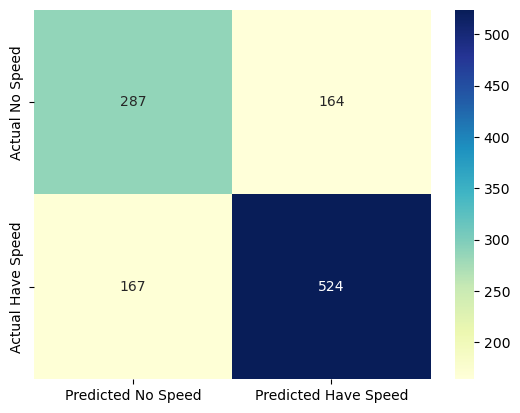

In [92]:
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted No Speed', 'Predicted Have Speed'], index = ['Actual No Speed', 'Actual Have Speed'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

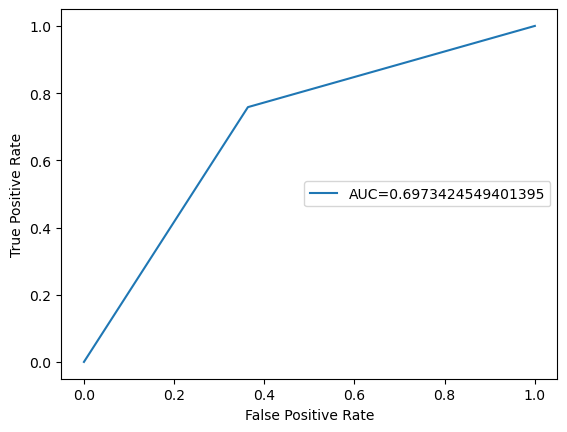

In [93]:
#define metrics
fpr, tpr, _ = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=5)
plt.show()

###  Linear regression

In [20]:
x=SBA_float_data.drop(["CPR_indicator","MTG_PL_CPR_6M"],axis=1)
y=SBA_float_data["MTG_PL_CPR_6M"]
print(x)
print(y)

      Coupon    Factor  Current Amount  Original Amount     WAC  WAM  WALA  \
0      7.625  0.001181        26864.31      22744259.28   7.625    4   297   
1      7.945  0.000600         4855.09       8090331.36   7.945    3   297   
2      5.625  0.000241         9102.55      37830703.35   5.625    2   296   
3      5.375  0.002607        12675.14       4862877.47   5.375    5   296   
4      7.875  0.000758         7570.50       9986740.66   7.875    5   296   
...      ...       ...             ...              ...     ...  ...   ...   
3978   9.488  0.936417     13544035.63      14463678.33   9.488  106     8   
3979   9.421  0.920580     10280801.94      11167747.31   9.421  112     8   
3980   9.508  0.914832     14517244.60      15868756.78   9.508  112     7   
3981   9.381  0.960674     18240425.16      18987114.66   9.381  111     6   
3982  10.678  0.878805      8878362.31      10102770.00  10.678  112     6   

      Maturity  LQA_SECTOR_SCORE  FLT_SPREAD  MTG_WHLN_NUMBER_L

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [22]:
lin_reg = LinearRegression().fit(x_train,y_train)
lin_reg

LinearRegression()

In [23]:
lin_reg.score(x_test,y_test)

0.1889438348822009

In [24]:
lin_reg.score(x_train,y_train)

0.24600977154096593

### Lasso Regression

In [25]:
lasso_reg = Lasso(max_iter=10000).fit(x_train,y_train)
lasso_reg

Lasso(max_iter=10000)

In [26]:
lasso_reg.score(x_test,y_test)

0.15485439665754408

In [27]:
lasso_reg.score(x_train,y_train)

0.20372757830429133